# Rain prediction


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
data = pd.read_csv("dataset/weatherAUS.csv")
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.shape


(145460, 23)

In [5]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [6]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Univariant Analysis

### Windspeed9am 

In [7]:
data['WindSpeed9am']

0         20.0
1          4.0
2         19.0
3         11.0
4          7.0
          ... 
145455    13.0
145456    13.0
145457     9.0
145458    13.0
145459    17.0
Name: WindSpeed9am, Length: 145460, dtype: float64

In [8]:
data.WindSpeed9am.isna().sum()

1767

In [9]:
# data.dropna(inplace=True, subset=['WindSpeed9am'])

In [10]:
data.WindSpeed9am.isna().sum()

1767

In [11]:
data.WindSpeed9am.nunique()

43

In [12]:
data.WindSpeed9am.unique()

array([ 20.,   4.,  19.,  11.,   7.,   6.,  15.,  17.,  28.,  24.,  nan,
         9.,   0.,  13.,   2.,  26.,  30.,  22.,  35.,  37.,  31.,  33.,
        48.,  39.,  44.,  43.,  41.,  46.,  56.,  83.,  74.,  52.,  65.,
        50., 130.,  54.,  61.,  57.,  59.,  87.,  67.,  63.,  69.,  72.])

In [13]:
data.WindSpeed9am.value_counts()

9.0      13649
13.0     13132
11.0     11728
17.0     10788
7.0      10783
15.0     10625
6.0       9118
19.0      8763
0.0       8745
20.0      8063
4.0       6360
22.0      5672
24.0      5450
2.0       4609
26.0      3766
28.0      3568
30.0      2336
31.0      2025
33.0      1130
35.0       977
37.0       589
39.0       455
41.0       326
43.0       272
44.0       197
46.0       175
50.0        88
48.0        87
52.0        65
56.0        44
54.0        38
57.0        22
61.0        11
63.0         9
65.0         8
59.0         5
74.0         4
67.0         4
87.0         2
69.0         2
83.0         1
130.0        1
72.0         1
Name: WindSpeed9am, dtype: int64

In [14]:
(data.WindSpeed9am.value_counts()/len(data))*100

9.0      9.383336
13.0     9.027911
11.0     8.062698
17.0     7.416472
7.0      7.413035
15.0     7.304414
6.0      6.268390
19.0     6.024337
0.0      6.011962
20.0     5.543105
4.0      4.372336
22.0     3.899354
24.0     3.746734
2.0      3.168569
26.0     2.589028
28.0     2.452908
30.0     1.605940
31.0     1.392135
33.0     0.776846
35.0     0.671662
37.0     0.404922
39.0     0.312801
41.0     0.224117
43.0     0.186993
44.0     0.135432
46.0     0.120308
50.0     0.060498
48.0     0.059810
52.0     0.044686
56.0     0.030249
54.0     0.026124
57.0     0.015124
61.0     0.007562
63.0     0.006187
65.0     0.005500
59.0     0.003437
74.0     0.002750
67.0     0.002750
87.0     0.001375
69.0     0.001375
83.0     0.000687
130.0    0.000687
72.0     0.000687
Name: WindSpeed9am, dtype: float64

In [15]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(6,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

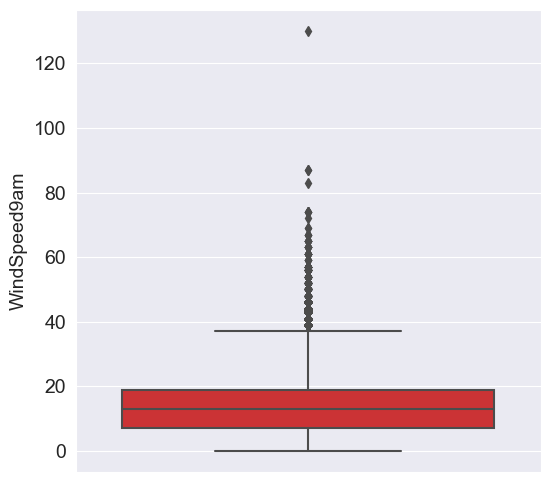

In [16]:
sns.boxplot(y="WindSpeed9am", data=data, palette="Set1")
plt.show()

**Interpretation**
- The above plot shows that 
    - Maximum values lies between 0 to 38
    - This data have many outliers 
    - So it should be cleaned

##  Windspeed3pm 


In [17]:
data['WindSpeed3pm']

0         24.0
1         22.0
2         26.0
3          9.0
4         20.0
          ... 
145455    11.0
145456     9.0
145457     9.0
145458     7.0
145459    17.0
Name: WindSpeed3pm, Length: 145460, dtype: float64

In [18]:
data.WindSpeed3pm.isna().sum()

3062

In [19]:
# data.dropna(inplace=True, subset=['WindSpeed3pm'])

In [20]:
data.WindSpeed3pm.isna().sum()

3062

In [21]:
data.WindSpeed3pm.nunique()

44

In [22]:
data.WindSpeed3pm.unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., nan, 37., 46., 39., 50., 35.,
       44., 41., 43., 56., 61., 54., 52., 83., 65., 78., 57., 63., 59.,
       74., 72., 69., 76., 87., 67.])

In [23]:
data.WindSpeed3pm.value_counts()

13.0    12580
17.0    12539
20.0    11713
15.0    11483
19.0    11263
11.0    10015
9.0      9753
24.0     9052
22.0     8598
28.0     6553
26.0     6508
7.0      5903
30.0     4589
31.0     3985
6.0      3805
33.0     2510
4.0      2249
35.0     2155
37.0     1370
0.0      1112
39.0     1106
2.0      1034
41.0      656
43.0      558
44.0      351
46.0      288
50.0      182
48.0      181
52.0       85
54.0       58
56.0       55
57.0       27
59.0       20
61.0       18
65.0       18
63.0       13
69.0        3
72.0        2
76.0        2
83.0        2
74.0        1
78.0        1
87.0        1
67.0        1
Name: WindSpeed3pm, dtype: int64

In [24]:
(data.WindSpeed3pm.value_counts()/len(data))*100

13.0    8.648426
17.0    8.620239
20.0    8.052386
15.0    7.894266
19.0    7.743022
11.0    6.885054
9.0     6.704936
24.0    6.223017
22.0    5.910903
28.0    4.505019
26.0    4.474082
7.0     4.058160
30.0    3.154819
31.0    2.739585
6.0     2.615839
33.0    1.725560
4.0     1.546130
35.0    1.481507
37.0    0.941840
0.0     0.764471
39.0    0.760346
2.0     0.710848
41.0    0.450983
43.0    0.383611
44.0    0.241303
46.0    0.197993
50.0    0.125120
48.0    0.124433
52.0    0.058435
54.0    0.039874
56.0    0.037811
57.0    0.018562
59.0    0.013749
61.0    0.012375
65.0    0.012375
63.0    0.008937
69.0    0.002062
72.0    0.001375
76.0    0.001375
83.0    0.001375
74.0    0.000687
78.0    0.000687
87.0    0.000687
67.0    0.000687
Name: WindSpeed3pm, dtype: float64

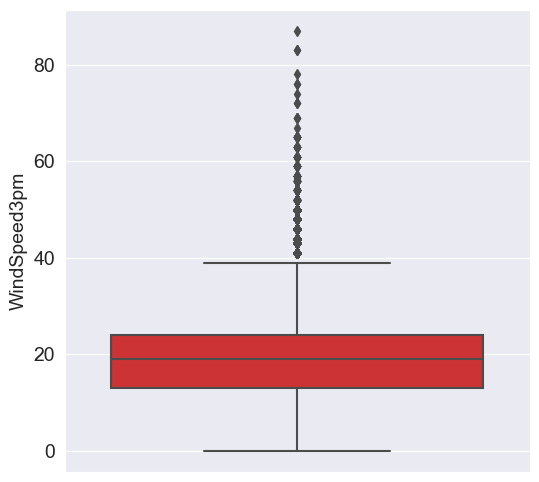

In [25]:
sns.boxplot(y="WindSpeed3pm", data=data, palette="Set1")
plt.show()

**Interpretation**
- The above plot shows that 
    - Maximum values lies between 0 to 39
    - This data have many outliers 
    - So it should be cleaned

## Humidity9am 

In [26]:
data['Humidity9am']

0         71.0
1         44.0
2         38.0
3         45.0
4         82.0
          ... 
145455    51.0
145456    56.0
145457    53.0
145458    51.0
145459    62.0
Name: Humidity9am, Length: 145460, dtype: float64

In [27]:
data.Humidity9am.isna().sum()

2654

In [28]:
# data.dropna(inplace=True, subset=['Humidity9am'])

In [29]:
data.Humidity9am.isna().sum()

2654

In [30]:
data.Humidity9am.nunique()

101

In [31]:
data.Humidity9am.unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  nan,  24.,  25.,  31.,
        18.,  23.,  26.,  28.,  30.,  19.,  22.,  17.,  15.,   9.,  12.,
        13.,  16.,   6.,  10.,  14.,  11.,   7.,   8.,   5.,   3.,   2.,
         4.,   0.,   1.])

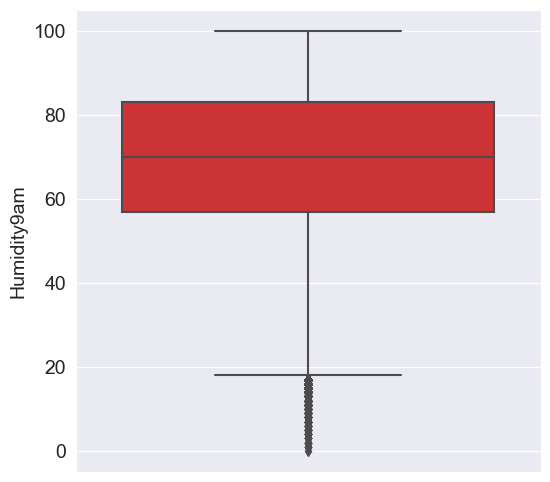

In [32]:
sns.boxplot(y="Humidity9am", data=data, palette="Set1")
plt.show()

**Interpretation**
- The above plot shows that 
    - Maximum values lies between 19 to 100
    - This data have many outliers 
    - So it should be cleaned

## Humidity3pm 

In [33]:
data.Humidity3pm.isna().sum()

4507

In [34]:
data.Humidity3pm.nunique()

101

In [35]:
data.Humidity3pm.unique()

array([ 22.,  25.,  30.,  16.,  33.,  23.,  19.,   9.,  27.,  91.,  93.,
        43.,  32.,  28.,  82.,  65.,  26.,  24.,  17.,  15.,  70.,  12.,
         8.,  31.,  20.,  10.,  21.,  39.,  13.,  11.,  69.,  18.,  14.,
        35.,  90.,  68.,  74.,  41.,  34.,  78.,  49.,  37.,  42.,  47.,
        52.,  29.,  86.,  89.,  62.,  79.,  48.,  46.,  38.,  44.,  51.,
        36.,  45.,  40.,  53.,  61.,  59.,  63.,  54.,  57.,  50.,  58.,
        75.,  97.,  80.,  95.,  56.,  72.,  60.,  71.,  73.,  81.,  76.,
        64.,  87.,  85.,  67.,  55.,  77.,  84.,   7.,  99.,  92.,  66.,
        83.,  94.,  96.,  88.,  nan, 100.,  98.,   5.,   6.,   1.,   4.,
         2.,   3.,   0.])

In [36]:
data.Humidity3pm.value_counts()

52.0    2751
55.0    2738
57.0    2728
53.0    2697
59.0    2690
        ... 
4.0      113
3.0       63
2.0       35
1.0       26
0.0        4
Name: Humidity3pm, Length: 101, dtype: int64

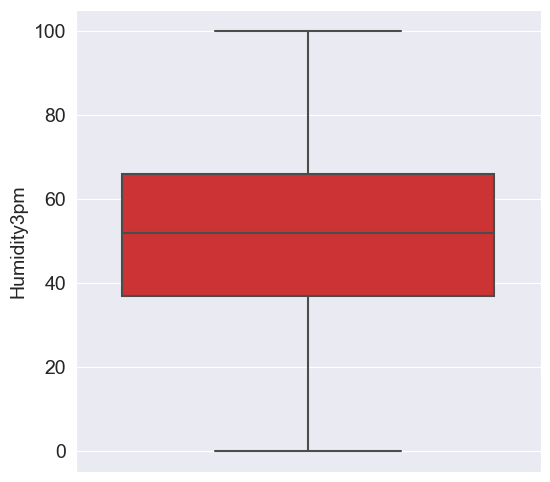

In [37]:
sns.boxplot(y="Humidity3pm", data=data, palette="Set1")
plt.show()

**Interpretation**
- The above plot shows that 
    - Maximum values lies between 0 to 100
    

## Pressure9am 

In [38]:
data.Pressure9am.isna().sum()

15065

In [39]:
data.Pressure9am.nunique()

546

In [40]:
data.Pressure9am.unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

In [41]:
data.Pressure9am.value_counts()

1016.4    816
1017.9    789
1016.3    775
1018.7    775
1018.0    769
         ... 
982.3       1
989.0       1
1041.0      1
985.1       1
990.6       1
Name: Pressure9am, Length: 546, dtype: int64

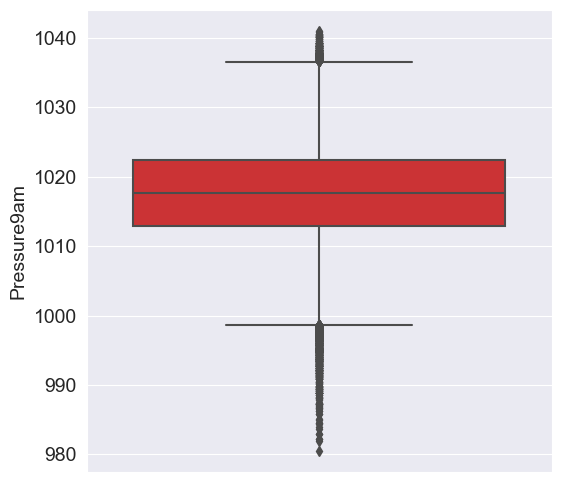

In [42]:
sns.boxplot(y="Pressure9am", data=data, palette="Set1")
plt.show()

**Interpretation**
- The above plot shows that 
    - Maximum values lies between 999 to 1037
    - This data have many outliers 
    - So it should be cleaned

## Pressure3pm 

In [43]:
data.Pressure3pm.isna().sum()

15028

In [44]:
data.Pressure3pm.unique()

array([1007.1  , 1007.8  , 1008.7  , 1012.8  , 1006.   , 1005.4  ,
       1008.2  , 1010.1  , 1003.6  , 1005.7  , 1004.2  ,  993.   ,
       1001.8  , 1010.3  , 1010.4  , 1002.2  , 1009.7  , 1017.1  ,
       1014.8  , 1008.1  , 1007.6  , 1001.7  , 1003.4  , 1005.1  ,
       1003.2  , 1013.1  , 1009.2  , 1006.7  , 1002.7  , 1010.9  ,
       1013.7  , 1006.8  , 1012.1  , 1006.9  , 1012.7  , 1017.4  ,
       1016.2  , 1010.6  , 1004.8  , 1005.9  ,  997.8  , 1003.9  ,
       1014.6  , 1014.1  , 1011.6  , 1011.8  , 1010.2  , 1010.5  ,
       1007.4  , 1004.7  , 1002.6  , 1005.   , 1003.8  , 1006.5  ,
       1008.5  , 1011.1  , 1017.3  , 1019.7  , 1016.4  , 1013.8  ,
       1013.5  , 1007.5  , 1004.5  , 1010.8  , 1012.4  , 1013.4  ,
       1015.   , 1012.6  , 1004.6  , 1009.   , 1012.   , 1014.7  ,
       1015.9  , 1018.   , 1018.9  , 1008.   , 1013.2  , 1013.9  ,
       1013.6  , 1014.4  , 1019.2  , 1017.2  , 1020.7  , 1020.6  ,
       1019.1  , 1019.5  , 1019.4  , 1018.4  , 1012.9  , 1019.

In [45]:
data.Pressure3pm.nunique()

549

In [46]:
data.Pressure3pm.value_counts()

1015.300    786
1015.500    783
1015.600    776
1015.700    773
1013.500    767
           ... 
1037.200      1
1037.600      1
987.600       1
1009.555      1
989.500       1
Name: Pressure3pm, Length: 549, dtype: int64

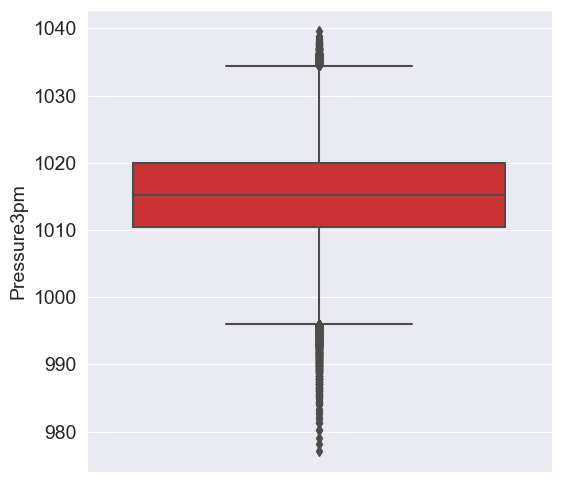

In [47]:
sns.boxplot(y="Pressure3pm", data=data, palette="Set1")
plt.show()

**Interpretation**
- The above plot shows that 
    - Maximum values lies between 997 to 1034
    - This data have many outliers 
    - So it should be cleaned

## WindDir9am 


In [48]:
data.WindDir9am.isna().sum()

10566

In [49]:
data.WindDir9am.nunique()

16

In [50]:
data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [51]:
data.WindDir9am.value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

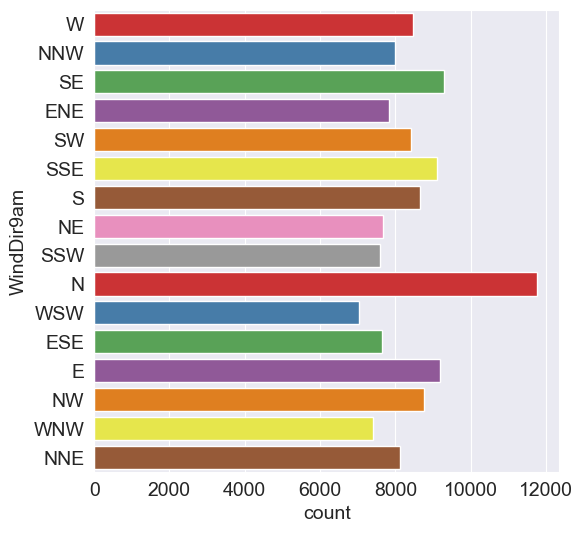

In [52]:
sns.countplot(y="WindDir9am", data=data, palette="Set1")
plt.show()

### WindDir3pm as target column

In [53]:
data.WindDir3pm.isna().sum()

4228

In [54]:
data.WindDir3pm.nunique()

16

In [55]:
data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [56]:
data.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

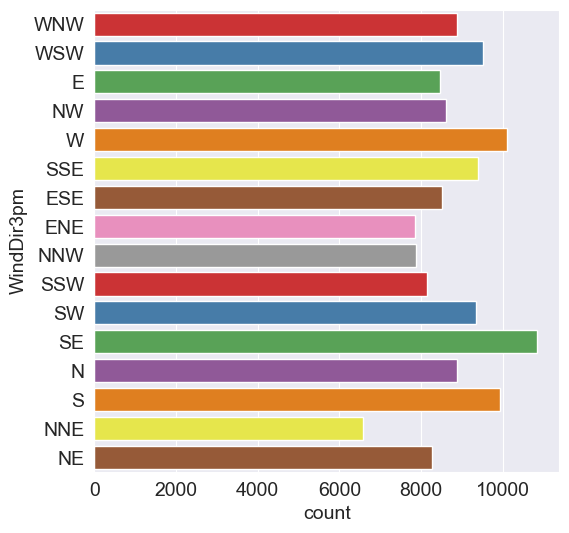

In [57]:
sns.countplot(y="WindDir3pm", data=data, palette="Set1")
plt.show()

## WindGustDir

In [58]:
data.WindGustDir.isna().sum()

10326

In [59]:
data.WindGustDir.nunique()

16

In [60]:
data.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [61]:
data.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

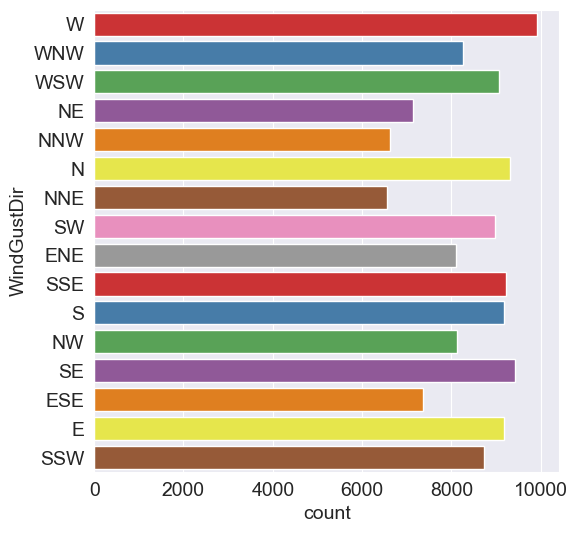

In [62]:
sns.countplot(y="WindGustDir", data=data, palette="Set1")
plt.show()

## Cloud9am

In [63]:
data.Cloud9am.isna().sum()

55888

In [64]:
data.Cloud9am.nunique()

10

In [65]:
data.Cloud9am.unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

In [66]:
data.Cloud9am.value_counts()

7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: Cloud9am, dtype: int64

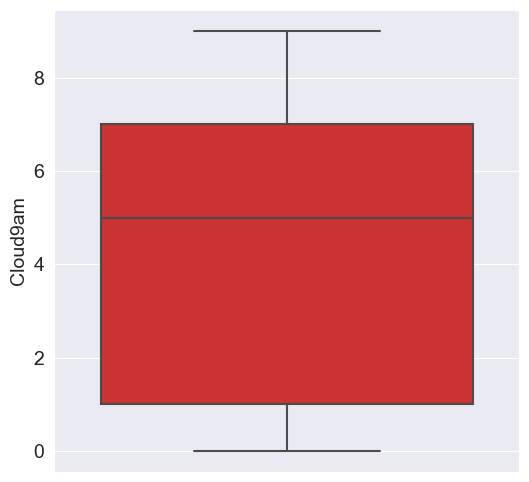

In [79]:
sns.boxplot(y="Cloud9am", data=data, palette="Set1")
plt.show()

## Cloud3pm

In [68]:
data.Cloud3pm.isna().sum()

59358

In [69]:
data.Cloud3pm.nunique()

10

In [70]:
data.Cloud3pm.unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

In [71]:
data.Cloud3pm.value_counts()

7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: Cloud3pm, dtype: int64

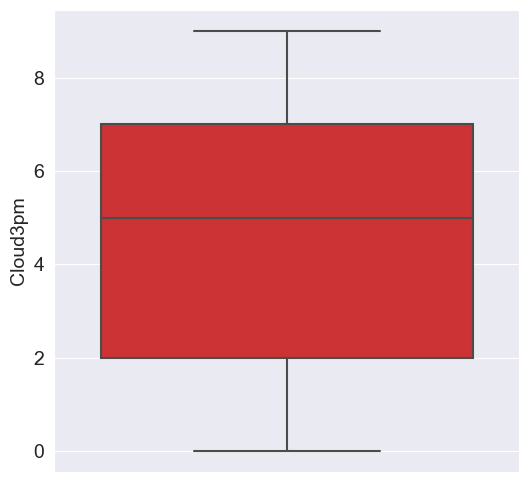

In [78]:
sns.boxplot(y="Cloud3pm", data=data, palette="Set1")
plt.show()

## Temp9am

In [73]:
data.Temp9am.isna().sum()

1767

In [74]:
data.Temp9am.nunique()

441

In [75]:
data.Temp9am.unique()

array([16.9, 17.2, 21. , 18.1, 17.8, 20.6, 16.3, 18.3, 20.1, 20.4, 15.9,
       17.4, 15.8, 17.3, 18. , 15.5, 19.1, 24.5, 23.8, 20.9, 21.5, 23.2,
       26.6, 24.6, 21.6, 12.5, 19.7, 14.9, 17.1, 20.7, 22.4, 23.1, 25.2,
       17.9, 20.2, 22.8, 24.2, 24.3, 25.6, 27.6, 16. , 22. , 26.8, 27.3,
       26.1, 23.3, 21.2, 23.4, 25.8, 28.2, 29. , 29.2, 29.9, 32.4, 28.8,
       27.2, 25.5, 26.5, 28.7, 29.6, 34.5, 18.7, 16.7, 17. , 19.2, 21.4,
       22.1, 19.3, 15. , 20. , 22.2, 23. , 15.6, 13.9, 12.6, 13.3, 17.6,
       18.6, 19. , 19.9, 12.7, 12.2, 12.1, 14.7, 18.8, 15.4, 16.2, 16.5,
       14. , 16.6, 18.4, 12.9, 13.8, 15.1, 16.4, 16.1, 20.5,  9.6, 12.4,
       14.1, 11.2,  9.5,  7.6, 10.1,  8.2,  7.9,  7.2, 10.6, 10.3, 10. ,
        8.3, 11. ,  9.4, 11.7,  8.5,  9.1,  7.5, 13. ,  7. ,  8.8,  7.4,
       11.9, 11.6, 13.6,  7.1, 10.2,  8. ,  9.2, 11.3,  4.7,  6.8,  4.9,
        2.2,  1.9,  5.9,  6.5,  5.4,  6.6,  5.6,  6.9,  8.4,  9.8, 13.5,
        7.8,  2.3,  2.4,  3.3,  3.8,  4.8,  8.1,  9

In [76]:
data.Temp9am.value_counts()

 17.0    912
 13.8    900
 14.8    894
 16.0    882
 14.0    876
        ... 
-7.2       1
-7.0       1
-3.5       1
-6.2       1
 38.0      1
Name: Temp9am, Length: 441, dtype: int64

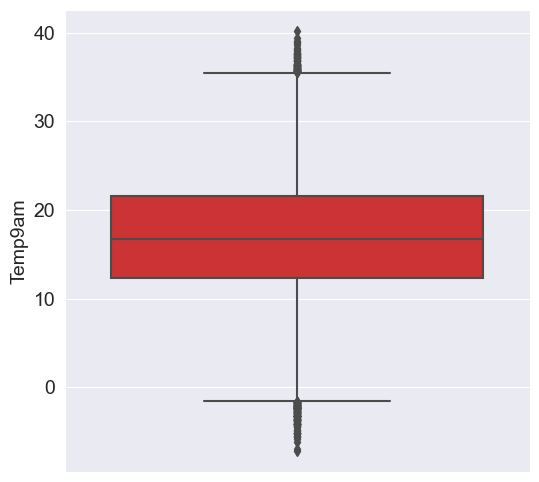

In [80]:
sns.boxplot(y="Temp9am", data=data, palette="Set1")
plt.show()

## Temp3pm

In [81]:
data.Temp3pm.isna().sum()

3609

In [82]:
data.Temp3pm.nunique()

502

In [83]:
data.Temp3pm.unique()

array([21.8, 24.3, 23.2, 26.5, 29.7, 28.9, 24.6, 25.5, 30.2, 28.2, 28.8,
       17. , 15.8, 19.8, 23.5, 26.2, 18.1, 21.5, 21. , 27.3, 31.6, 30.8,
       29. , 31.2, 33. , 32.1, 26.1, 18.2, 22.7, 25.7, 22.1, 33.9, 34.4,
       36.8, 38.4, 27.6, 26.6, 29.3, 30. , 33.2, 35.7, 41.5, 27.1, 25.8,
       30.5, 37.7, 36.1, 33.1, 36.5, 36.2, 39.2, 40.1, 41.2, 42. , 41.9,
       37.1, 35.2, 39.7, 41.6, 43.4, 38.5, 29.4, 24.9, 17.3, 28.5, 29.2,
       29.5, 27. , 30.7, 32.7, 26.8, 29.8, 31.3, 33.4, 28.6, 33.6, 28.1,
       21.9, 21.4, 22. , 29.6, 18.8, 23.8, 19.7, 18.3, 20.5, 23.9, 27.2,
       32.6, 33.5, 31.4, 19.6, 27.7, 29.9, 30.9, 27.4, 20.3, 21.2, 20.9,
       21.6, 25. , 24.4, 23.1, 18.9, 19.4, 22.9, 23.6, 21.3, 22.3, 22.6,
       15.1, 14.5, 11.6,  9.4, 14. , 12.1, 16.1, 16.3, 19.1, 18.5, 18.4,
       19.2, 20.2, 17.7, 18. , 14.6, 15.3, 15.9, 14.7, 18.7, 21.7, 20.8,
       19.5, 17.4, 15.6, 16.7, 16.8, 13.4, 13. , 16.5, 10.2, 11.5, 11.4,
        7.9,  9.7,  8.8, 15.5, 13.9, 15.4, 14.9, 16

In [84]:
data.Temp3pm.value_counts()

 20.0    882
 19.0    869
 18.5    869
 18.4    868
 17.8    859
        ... 
 46.2      1
-3.4       1
-4.1       1
 46.7      1
 45.0      1
Name: Temp3pm, Length: 502, dtype: int64

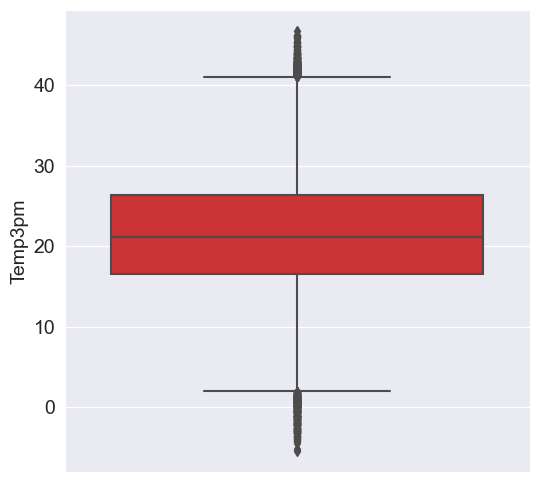

In [85]:
sns.boxplot(y="Temp3pm", data=data, palette="Set1")
plt.show()

## RainToday

In [87]:
data.RainToday.isna().sum()

3261

In [88]:
data.RainToday.nunique()

2

In [89]:
data.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [90]:
data.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

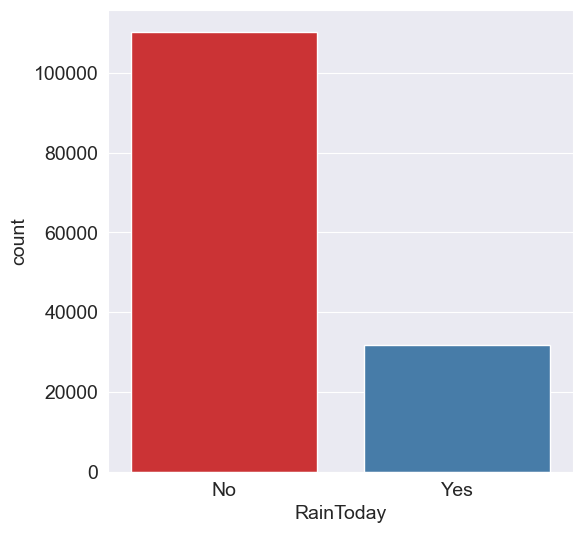

In [93]:
sns.countplot(x="RainToday", data=data, palette="Set1")
plt.show()

## Rain Tommorow

In [95]:
data.RainTomorrow.isna().sum()

3267

In [96]:
data.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [97]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

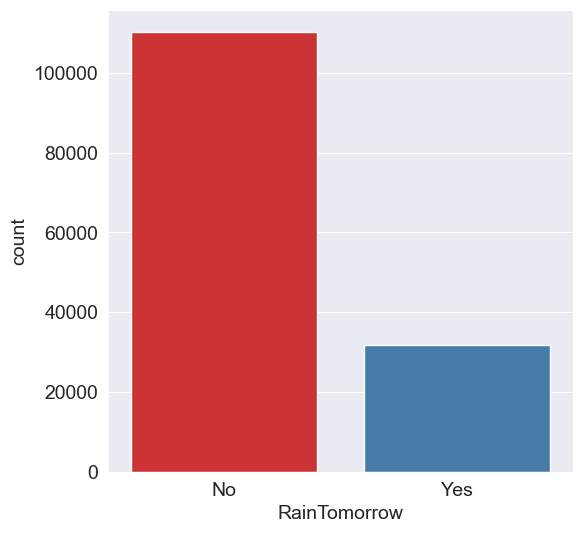

In [98]:
sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()